# 2-D Lattice Test #

In this example, we run the VBMDS-GP with the 2-D Lattice as a test

In [238]:
using Winston
using Distances
using Distributions
using Optim

In [366]:
# create dataset
# generate simple grid
nX = 5^2
X = zeros(nX,2)
k = 1
for i = 1:sqrt(nX), j = 1:sqrt(nX)
    X[k,:] = 1.0*[i, j]
    k = k+1
end

Mdist = pairwise(Euclidean(), X').^2
k=1

nreps = 5
#nD = round(Int,((nX^2) - nX)/2)*nreps
nD = (nX^2 - nX)*nreps
println(nD)
D = zeros(nD, 3)
vn_true = 1.0
for reps = 1:nreps
    for i = 1:nX, j = 1:nX
        if i!=j
            d = LogNormal(log(Mdist[i,j]), sqrt(vn_true))
            D[k,:] = [i, j, rand(d) ]
            k = k+1
        end
    end
end


3000


In [367]:
D

3000×3 Array{Float64,2}:
  1.0   2.0   0.355978
  1.0   3.0   0.660832
  1.0   4.0   2.80881 
  1.0   5.0  53.7407  
  1.0   6.0   1.09714 
  1.0   7.0   0.559646
  1.0   8.0  17.6376  
  1.0   9.0   2.40471 
  1.0  10.0  23.4426  
  1.0  11.0   6.41788 
  1.0  12.0   2.20207 
  1.0  13.0   9.48524 
  1.0  14.0  51.7025  
  ⋮                   
 25.0  13.0   8.10678 
 25.0  14.0  38.4216  
 25.0  15.0   2.70941 
 25.0  16.0  18.3423  
 25.0  17.0  12.7852  
 25.0  18.0   9.46774 
 25.0  19.0   1.45088 
 25.0  20.0   0.992602
 25.0  21.0   7.42797 
 25.0  22.0  15.6204  
 25.0  23.0   7.00715 
 25.0  24.0   1.02283 

In [368]:
X # this are the true underlying positions. 

25×2 Array{Float64,2}:
 1.0  1.0
 1.0  2.0
 1.0  3.0
 1.0  4.0
 1.0  5.0
 2.0  1.0
 2.0  2.0
 2.0  3.0
 2.0  4.0
 2.0  5.0
 3.0  1.0
 3.0  2.0
 3.0  3.0
 3.0  4.0
 3.0  5.0
 4.0  1.0
 4.0  2.0
 4.0  3.0
 4.0  4.0
 4.0  5.0
 5.0  1.0
 5.0  2.0
 5.0  3.0
 5.0  4.0
 5.0  5.0

In [522]:
Xtest = [1.0./X[:,1].^2-X[:,2] X[:,1]./X[:,2] X[:,1]+X[:,2]]
Nirr = 5
Xtest = hcat(Xtest, 10*rand(size(X,1), Nirr))

25×8 Array{Float64,2}:
  0.0       1.0        2.0  4.46741   0.901875  5.9634   5.56694  3.12323
 -1.0       0.5        3.0  0.167393  4.01161   8.8546   6.87567  4.40511
 -2.0       0.333333   4.0  2.25861   2.35848   1.47544  8.36969  6.38953
 -3.0       0.25       5.0  4.15064   0.720077  8.76637  8.52185  1.20195
 -4.0       0.2        6.0  7.45312   7.99674   1.61144  9.3567   6.25432
 -0.75      2.0        3.0  6.07041   2.65915   2.62937  2.91309  6.92741
 -1.75      1.0        4.0  7.79581   0.922574  9.42458  6.67458  8.76867
 -2.75      0.666667   5.0  1.17306   1.14706   9.26857  9.72966  1.23717
 -3.75      0.5        6.0  9.52308   7.66061   6.44527  4.89394  4.01736
 -4.75      0.4        7.0  9.30186   7.45676   3.95285  1.05433  1.81068
 -0.888889  3.0        4.0  2.76652   5.85083   4.95558  9.61397  9.57735
 -1.88889   1.5        5.0  9.31351   4.14854   4.03313  3.49087  4.65604
 -2.88889   1.0        6.0  2.15503   4.51389   9.97019  1.48241  8.13792
 -3.88889   0.7

In [529]:
# side information
# nonlinear transformation of the input coordinates
#Xtest = [2*X[:,1].^2-X[:,2] X[:,1].*X[:,2] X[:,1]+X[:,2]]

for i=1:size(Xtest,2)
    Xtest[:,i] = (Xtest[:,i] - mean(Xtest[:,i]))./(1.0+maximum(Xtest[:,i]))
end
Xfeat = Xtest

# We set the inducing input locations with some noise
Xu = Xtest # inducing input locations
Xu = Xu + 0.05*rand(size(Xu))
println("Num Inducing inputs: ",size(Xu,1))

Num Inducing inputs: 25


In [530]:
Xfeat

25×8 Array{Float64,2}:
  2.70728    -0.023125    -0.129032   …   0.0232193   -0.0107454  -0.0802282
  1.70728    -0.054375    -0.0967742      0.116754     0.0326061  -0.0371139
  0.707278   -0.0647917   -0.0645161     -0.121972     0.0820948   0.0296296
 -0.292722   -0.07        -0.0322581      0.113899     0.087135   -0.144848 
 -1.29272    -0.073125     0.0           -0.117573     0.114789    0.0250819
  1.95728     0.039375    -0.0967742  …  -0.0846411   -0.0986531   0.0477205
  0.957278   -0.023125    -0.0645161      0.135193     0.0259448   0.109649 
 -0.0427222  -0.0439583   -0.0322581      0.130146     0.127143   -0.143663 
 -1.04272    -0.054375     0.0            0.0388085   -0.0330383  -0.0501554
 -2.04272    -0.060625     0.0322581     -0.0418249   -0.160224   -0.124374 
  1.81839     0.101875    -0.0645161  …  -0.00938506   0.123311    0.136848 
  0.818389    0.008125    -0.0322581     -0.0392276   -0.0795144  -0.0286743
 -0.181611   -0.023125     0.0            0.152845   

In [531]:
include("vbmds.jl") # load in the VBMDS code

vbmds

In [532]:
# set up parameters
srand(0)

nZ = nX # number of latent points
num_lower_dim = 2 # number of latent dimensions
#kfunc = vbmds.seARDkernel # kernel function

lbfunc = vbmds.lognormalEucMixLB #likelihood lower bound
#lbfunc = vbmds.normalSqEucLB

kfunc = vbmds.seNNkernel
hyp = 0.01*randn(size(Xfeat,2).^2)
hyp = vcat(hyp, [0.02])

#hyp = sqrt(0.02*ones(size(Xfeat,2)))# hyperparameters

#vcat(hyp, [0.02])
#kfunc = vbmds.sekernel
#hyp=[0.02]
m = [] # mean of inducing variables (set to [] if you want auto init)
v = [] # diagonal of inducing variables (set to [] if you want auto init)
mu = []
s2 = 10.0*ones(nZ, num_lower_dim)
vn = 0.1 #noise variance
m0 = [] # initial prior for m (Set to [] if you want auto)
v0 = [] # intiial prior for v (Set to [] if you want auto)
mu0 = []
s20 = .1*ones(nZ, num_lower_dim)
init_method = "random"# "random" for random initialization, "mds" for MDS initialization
mds_vn = 0.01

params = vbmds.VBMDSMixParams(Xu, num_lower_dim, 
lbfunc, kfunc, 
hyp, 
m, v, 
mu, s2,
vn, 
m0, v0,
mu0, s20,
init_method, mds_vn)
println("Parameters Set up!")

Parameters Set up!


In [533]:
nnhyplb = -100*ones(length(params.hyp))#sqrt(0.01),
nnhypub = 10000*ones(length(params.hyp))#sqrt(100.0)
nnhyplb[end] = 0.0001
nnhypub[end] = 100

100

In [534]:
nZ = nX
Xfeat_local = []
params = vbmds.VBMDSMix(D, Xfeat_local, nZ, params; 
opt_method=GradientDescent(),
sample_size = 0, #run on all 
num_iterations= 100, 
opt_iterations = 100,
opt_hyp_iterations = 100,
opt_vn_iterations = 100,
local_iterations= 1, 
report_interval=100, 
fixed_noise = true,
fixed_hyp = false,
show_trace = false,
vlb = 1.0e-2,
vub = 1.0,
s2lb = 1.0e-4,
s2ub = 100.0,
vnlb = 1.0e-5,
vnub = 2*vn_true,
hyplb = nnhyplb,#sqrt(0.01),
hypub = nnhypub#sqrt(100.0)
)

println("Done Optimizing.")
#run(`say -v Allison \"Done Optimizing Lattice \"`)


Creating Parameters
Setting up Fixed Variables
Outer Iteration: 1
Local Sample Iteration: 1
Number Function Calls: 360
Number Gradient Calls: 360
2: 17037.354097405485
Outer Iteration: 2
Local Sample Iteration: 1
Number Function Calls: 373
Number Gradient Calls: 373
3: 16994.964183653683
Outer Iteration: 3
Local Sample Iteration: 1
Number Function Calls: 349
Number Gradient Calls: 349
4: 16990.334194756855
Outer Iteration: 4
Local Sample Iteration: 1
Number Function Calls: 27
Number Gradient Calls: 27
5: 16990.2126720559
Outer Iteration: 5
Local Sample Iteration: 1
Number Function Calls: 4
Number Gradient Calls: 4
6: 16990.198680395406
Outer Iteration: 6
Local Sample Iteration: 1
Number Function Calls: 49
Number Gradient Calls: 49
7: 16989.363141786795
Outer Iteration: 7
Local Sample Iteration: 1
Number Function Calls: 4
Number Gradient Calls: 4
8: 16989.35225730854
Outer Iteration: 8
Local Sample Iteration: 1
Number Function Calls: 5
Number Gradient Calls: 5
9: 16989.344784497152
Oute

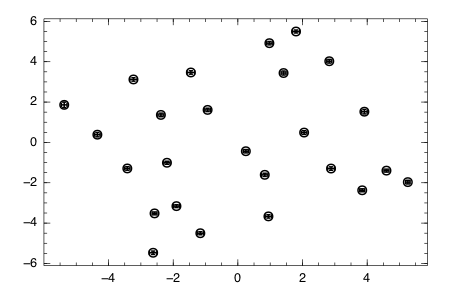

In [536]:
# Prediction
p = 0

#plotting via Winston
hold(false)
if Xfeat_local != []
    (mZ_pred, vZ_pred) = vbmds.VBMDSMix(0, Xfeat, nZ, params)
    println("Using GP")
    errbarsx = SymmetricErrorBarsX(mZ_pred[:,1], mZ_pred[:,2], 2*sqrt(vZ_pred[:,1]))
    errbarsy = SymmetricErrorBarsY(mZ_pred[:,1], mZ_pred[:,2], 2*sqrt(vZ_pred[:,2]))

    p = scatter(mZ_pred[:,1], mZ_pred[:,2])
    hold(true)
    add(p, errbarsx)
    add(p, errbarsy)
end

p = scatter(params.mu[:,1], params.mu[:,2])

hold(true)
errbarsx_z = SymmetricErrorBarsX(params.mu[:,1], params.mu[:,2], sqrt(params.s2[:,1]))
errbarsy_z = SymmetricErrorBarsY(params.mu[:,1], params.mu[:,2], sqrt(params.s2[:,2]))
add(p, errbarsx_z)
add(p, errbarsy_z)
p

In [257]:
a = [1,2,3,4]
length(a)

4

In [173]:

a = [1,2,3,4]
a = reshape(a, length())

2×2 Array{Int64,2}:
 1  3
 2  4

In [172]:
a[end]

3